В этом проекте я напишу градиентный спуск и посмотрю как он работает с различными параметрами и функциями потерь

In [1]:
from typing import Iterable, List

import matplotlib.pyplot as plt
import numpy as np

In [2]:
import abc


class BaseLoss(abc.ABC):
    """Базовый класс лосса"""

    @abc.abstractmethod
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        raise NotImplementedError

    @abc.abstractmethod
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        raise NotImplementedError

In [3]:
class MSELoss(BaseLoss):
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """

        return 1/X.shape[0]*(sum((np.dot(X,w)-y)**2))
        # Вычислите значение функции потерь при помощи X, y и w и верните его

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """

        return 2/X.shape[0]*X.T.dot(X.dot(w)-y)
        # Вычислите значение вектора градиента при помощи X, y и w и верните его

In [4]:
# Создадим объект лосса
loss = MSELoss()

# Создадим какой-то датасет
X = np.arange(200).reshape(20, 10)
y = np.arange(20)

# Создадим какой-то вектор весов
w = np.arange(10)

# Выведем значение лосса и градиента на этом датасете с этим вектором весов
print(loss.calc_loss(X, y, w))
print(loss.calc_grad(X, y, w))

# Проверка, что методы реализованы правильно
assert loss.calc_loss(X, y, w) == 27410283.5, "Метод calc_loss реализован неверно"
assert np.allclose(
    loss.calc_grad(X, y, w),
    np.array(
        [
            1163180.0,
            1172281.0,
            1181382.0,
            1190483.0,
            1199584.0,
            1208685.0,
            1217786.0,
            1226887.0,
            1235988.0,
            1245089.0,
        ]
    ),
), "Метод calc_grad реализован неверно"
print("Всё верно!")

27410283.5
[1163180. 1172281. 1181382. 1190483. 1199584. 1208685. 1217786. 1226887.
 1235988. 1245089.]
Всё верно!


In [5]:
def gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    n_iterations: int = 100000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    w_history = [w_init.copy()]
    
    for _ in range(n_iterations):
        grad = loss.calc_grad(X, y, w_history[-1])
        update = w_history[-1] - lr * grad
        w_history.append(update)
    return w_history

Теперь создадим синтетический датасет и функцию, которая будет рисовать траекторию градиентного спуска по истории:

In [6]:
# Создаём датасет из двух переменных и реального вектора зависимости w_true

np.random.seed(1337)

n_features = 2
n_objects = 300
batch_size = 10
num_steps = 43

w_true = np.random.normal(size=(n_features,))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))
print(w_init)

print(X.shape)
print(y.shape)

[0.62074297 1.79288146]
(300, 2)
(300,)


In [7]:
loss = MSELoss()
w_list = gradient_descent(w_init, X, y, loss, 0.01, 100)
print(loss.calc_loss(X, y, w_list[0]))
print(loss.calc_loss(X, y, w_list[-1]))

425.5891768045028
0.86706443956495


In [8]:
def plot_gd(w_list: Iterable, X: np.ndarray, y: np.ndarray, loss: BaseLoss):
    """
    Функция для отрисовки траектории градиентного спуска
    :param w_list: Список из объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать лосс при помощи loss.calc_loss(X, y, w)
    """
    w_list = np.array(w_list)
    meshgrid_space = np.linspace(-2, 2, 100)
    A, B = np.meshgrid(meshgrid_space, meshgrid_space)

    levels = np.empty_like(A)
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            w_tmp = np.array([A[i, j], B[i, j]])
            levels[i, j] = loss.calc_loss(X, y, w_tmp)

    plt.figure(figsize=(15, 6))
    plt.title("GD trajectory")
    plt.xlabel(r"$w_1$")
    plt.ylabel(r"$w_2$")
    plt.xlim(w_list[:, 0].min() - 0.1, w_list[:, 0].max() + 0.1)
    plt.ylim(w_list[:, 1].min() - 0.1, w_list[:, 1].max() + 0.1)
    plt.gca().set_aspect("equal")

    # visualize the level set
    CS = plt.contour(
        A, B, levels, levels=np.logspace(0, 1, num=20), cmap=plt.cm.rainbow_r
    )
    CB = plt.colorbar(CS, shrink=0.8, extend="both")

    # visualize trajectory
    plt.scatter(w_list[:, 0], w_list[:, 1])
    plt.plot(w_list[:, 0], w_list[:, 1])

    plt.show()

При помощи функций `gradient_descent` и  `plot_gd` нарисую траекторию градиентного спуска для разных значений длины шага (параметра `lr`)

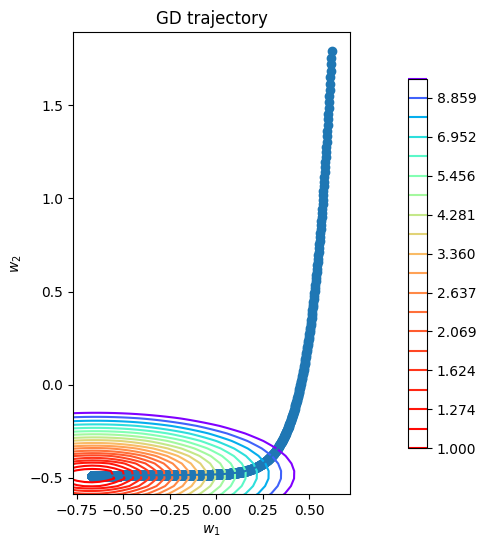

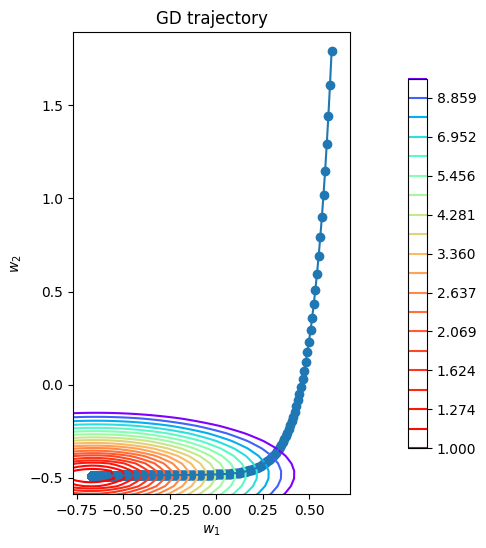

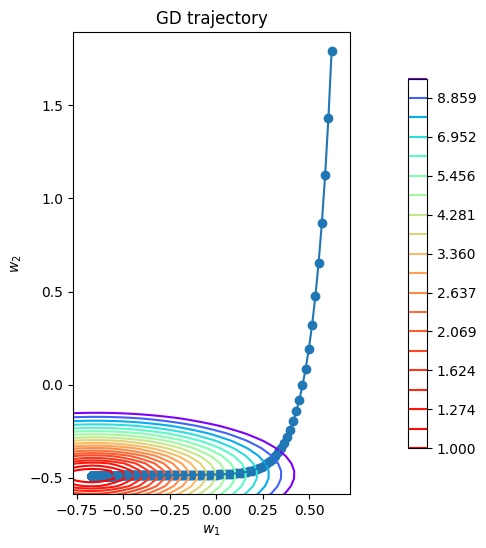

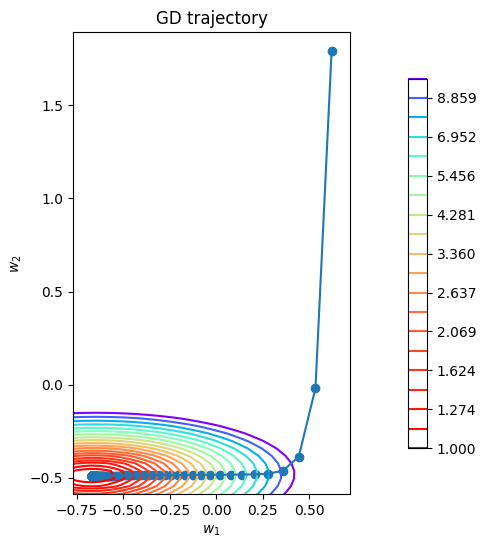

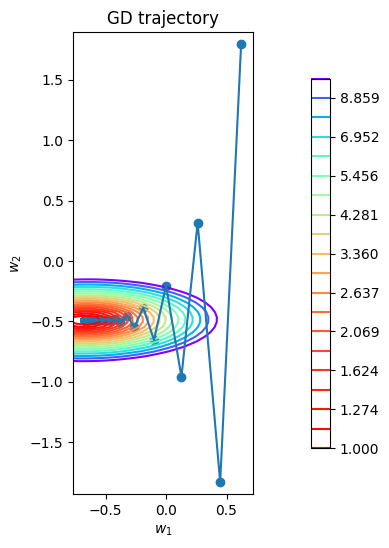

In [9]:
lrs = [0.0001, 0.0005, 0.001, 0.005, 0.01]
loss_function = MSELoss()
for lr in lrs:
    w_list = gradient_descent(w_init, X, y, loss_function, lr)
    plot_gd(w_list, X, y, loss_function)
    plt.show()

10000 шагов слишком большое значение чтобы здраво оценивать функции. Они все дошли до минимальной ошибки. Но конечно шаг 0.005 и 0.01 кажутся слишком большими, при шаге 0.01 функция вообще ведет себя как будто стохастически на первых итерациях

Реализуем функцию `stochastic_gradient_descent`

Функция будет принимать все те же параметры, что и функция `gradient_descent`, но ещё параметр `batch_size`, отвечающий за размер батча. 

In [10]:
def stochastic_gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    batch_size: int,
    n_iterations: int = 1000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    w = w_init.copy()
    w_history = [w]
    batch_size = 20
    for _ in range(n_iterations):
        batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
        X_batch = X[batch_indices]
        y_batch = y[batch_indices]
        
        grad = loss.calc_grad(X_batch, y_batch, w)
        
        w = w - lr * grad
        w_history.append(w)
        
    return w_history

При помощи функций `stochastic_gradient_descent` и  `plot_gd` нарисуем траекторию градиентного спуска для разных значений длины шага (параметра `lr`) и размера подвыборки (параметра `batch_size`).

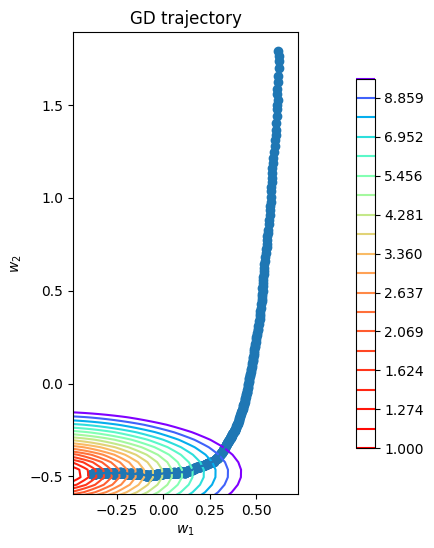

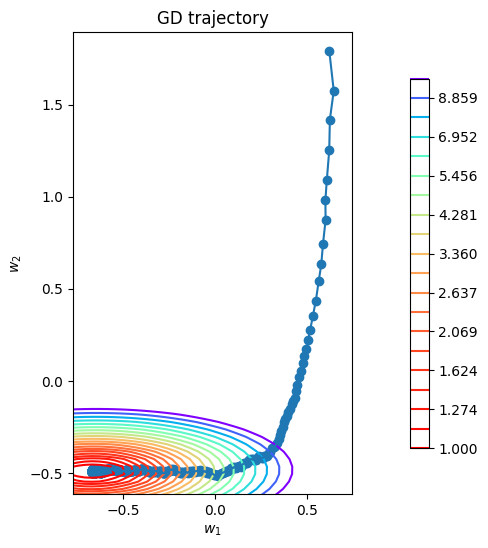

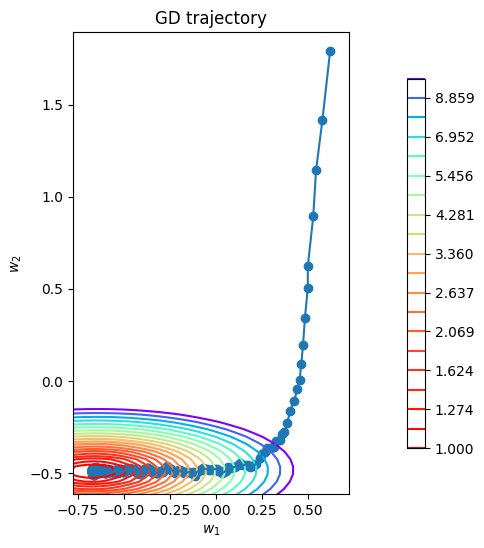

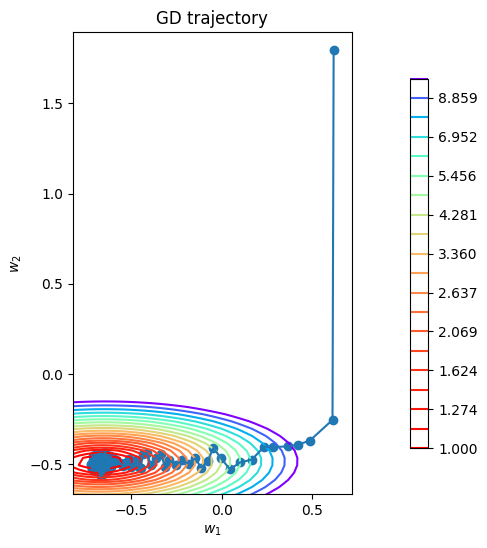

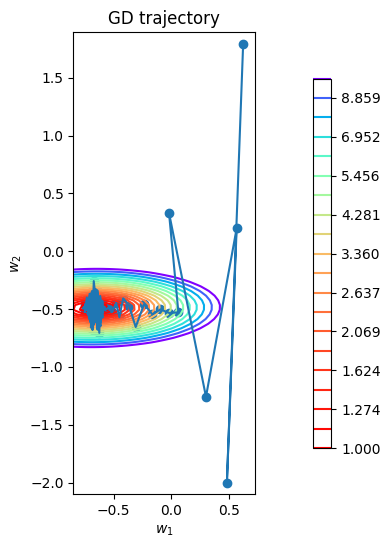

In [11]:
lrs = [0.0001, 0.0005, 0.001, 0.005, 0.01]
n_iterations = 100
loss_function = MSELoss()
for lr in lrs:
    w_list = stochastic_gradient_descent(w_init, X, y, loss_function, lr, n_iterations)
    plot_gd(w_list, X, y, loss_function)
    plt.show()

Для шага 0.0001 функция не успела дойти до минимальной ошибки. Для размера шага 0.0005 и 0.001 функция не показывает себя стохастически. Но для шагов 0.005 и 0.01 мы уже можем заметить что кривые носят стохастический характер вблизи минимальной ошибки для batch_size равным 20. Мы можем уменьшать batch_size чтобы функция вела себя более стохастически или увеличивать чтобы она больше была похожа на обычный градиентный спуск в зависимости от задачи

Как правило, в начале спуска мы хотим делать большие шаги, чтобы поскорее подойти поближе к минимуму, а позже мы уже хотим делать шаги маленькие, чтобы более точнее этого минимума достичь и не "перепрыгнуть" его. 

Чтобы достичь такого поведения мы можем постепенно уменьшать длину шага с увеличением номера итерации. Сделать это можно, например, вычисляя на каждой итерации длину шага по следующей формуле:

$$
    \eta_t
    =
    \lambda
    \left(
        \frac{s_0}{s_0 + t}
    \right)^p
$$

где $\eta_t$ — длина шага на итерации $t$, $\lambda$ — начальная длина шага (параметр `lr` у нас), $s_0$ и $p$ — настраиваемые параметры.

Реализуем функцию `stochastic_gradient_descent` на этот раз с затухающим шагом по формуле выше. Параметр $s_0$ возьмем равным 1. Параметр $p$ возьмем из нового аргумента функции `p`.

In [12]:
def stochastic_gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    batch_size: int,
    p: float,
    n_iterations: int = 1000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param p: float -- значение степени в формуле затухания длины шага
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    w = w_init.copy()
    s_0 = 1
    w_history = [w]
    for t in range(1, n_iterations + 1):
        eta_t = lr * (s_0 / (s_0 + t)) ** p
        
        batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
        X_batch = X[batch_indices]
        y_batch = y[batch_indices]
        
        grad = loss.calc_grad(X_batch, y_batch, w)
        
        w = w - eta_t * grad
        w_history.append(w)
        
    return w_history

При помощи новой функции `stochastic_gradient_descent` и функции `plot_gd` нарисуем траекторию градиентного спуска для разных значений параметра `p`. Параметр `lr` возьмем равным 0.01, а параметр `batch_size` равным 10.

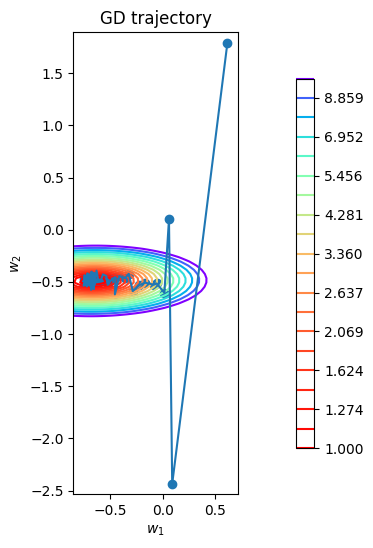

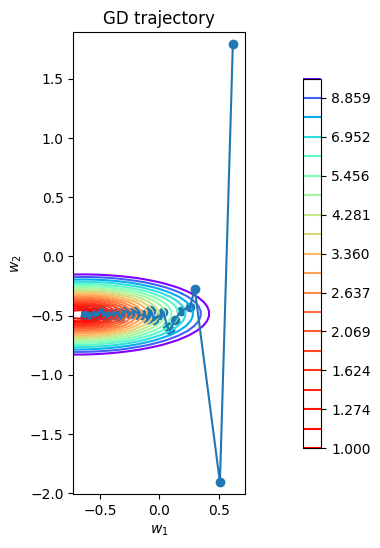

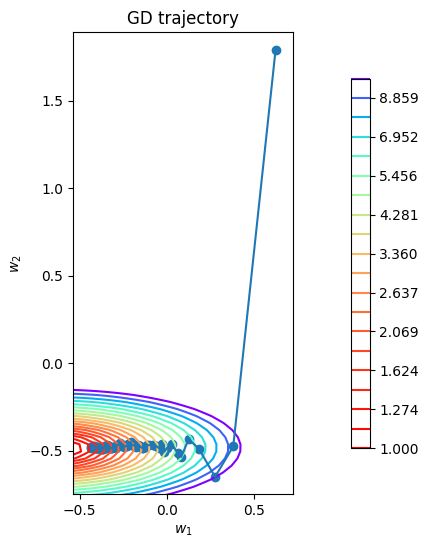

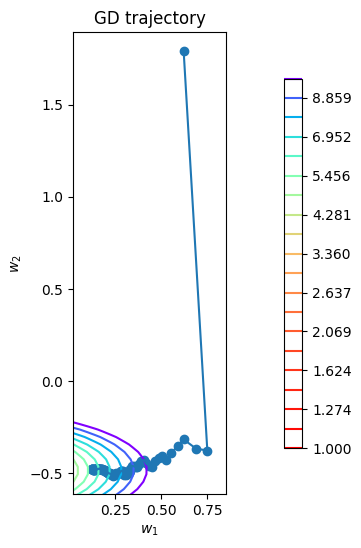

In [13]:
lrs = 0.01
batch_size = 10
ps = [0.1, 0.4, 0.7, 1]
n_iterations = 100
loss_function = MSELoss()
for p in ps:
    w_list = stochastic_gradient_descent(w_init, X, y, loss_function, lr, batch_size, p, n_iterations)
    plot_gd(w_list, X, y, loss_function)
    plt.show()

при p = 0.1 функция слишком медленно замедляется, в окрестности нуля она до сих пор ведет себя сильно стохастически. при p = 0.4 функция ведет себя отлично, она пришла в окрестность нуля и не ведет себя стохастически в этой окрестности. Для p 0.7 и 1 функция так и не сумела дойти до окрестности нуля, то есть шаг слишком быстро уменьшился

Сравним сходимость обычного градиентного спуска и стохастичекой версии:
Нарисуем график зависимости значения лосса (его можно посчитать при помощи метода `calc_loss`, используя $x$ и $y$ из датасета и $w$ с соответствующей итерации) от номера итерации для траекторий, полученных при помощи обычного и стохастического градиентного спуска с одинаковыми параметрами. Параметр `batch_size` также равный 10.

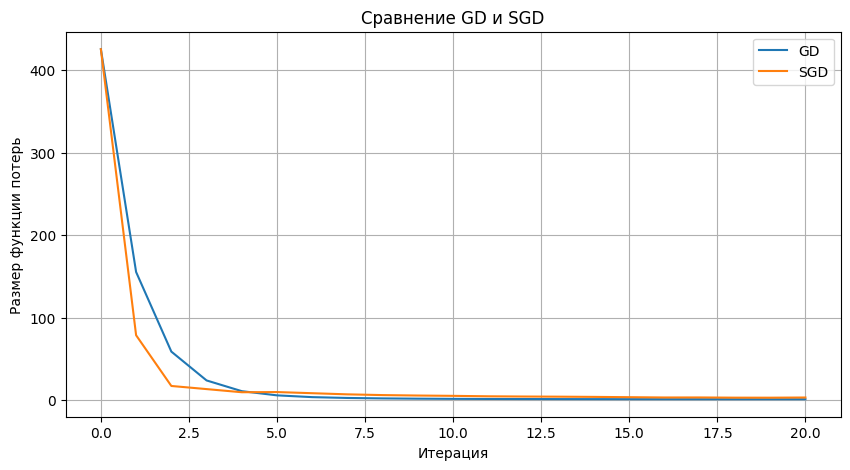

In [14]:
w_history_gd = gradient_descent(
    w_init=w_init,
    X=X,
    y=y,
    loss=loss_function,
    lr=0.01,
    n_iterations=20
)

w_history_sgd = stochastic_gradient_descent(
    w_init=w_init,
    X=X,
    y=y,
    loss=loss_function,
    lr=0.01,
    batch_size=10,
    p=0.4,
    n_iterations=20
)

loss_history_gd = [loss_function.calc_loss(X, y, w) for w in w_history_gd]
loss_history_sgd = [loss_function.calc_loss(X, y, w) for w in w_history_sgd]

plt.figure(figsize=(10, 5))
plt.plot(loss_history_gd, label='GD')
plt.plot(loss_history_sgd, label='SGD')
plt.xlabel('Итерация')
plt.ylabel('Размер функции потерь')
plt.title('Сравнение GD и SGD')
plt.legend()
plt.grid(True)
plt.show()

Взяв такие параметры n_iterations=50, p=0.4, lr=0.01, batch_size=10, мы можем увидеть что SGD пришел к достаточно небольшой ошибке уже на первом шаге, то есть наши параметры хорошо подобраны, у GD на это понадобилось по крайней мере 5 итераций, которые еще и дольше по времени

Теперь давайте напишем наш класс для линейной регрессии. Он будет использовать интерфейс, знакомый нам из библиотеки `sklearn`.

В методе `fit` мы будем подбирать веса `w` при помощи градиентного спуска нашим методом `gradient_descent`

В методе `predict` мы будем применять нашу регрессию к датасету, 

In [15]:
class LinearRegression:
    def __init__(self, loss: BaseLoss, lr: float = 0.1) -> None:
        self.loss = loss
        self.lr = lr

    def fit(self, X: np.ndarray, y: np.ndarray) -> "LinearRegression":
        X = np.asarray(X)
        y = np.asarray(y)
        X = np.hstack([X, np.ones([X.shape[0], 1])])

        w_init = np.zeros(X.shape[1])
        w_history = gradient_descent(w_init, X, y, self.loss, self.lr)
        self.w = w_history[-1]

        return self

    def predict(self, X: np.ndarray) -> np.ndarray:
        assert hasattr(self, "w"), "Linear regression must be fitted first"
        X = np.hstack([X, np.ones([X.shape[0], 1])])

        return X @ self.w

Теперь у нас есть наш класс линейной регрессии. Более того, мы можем управлять тем, какую функцию потерь мы оптимизируем, просто передавая разные классы в параметр `loss` при инициализации. 

Пока у нас нет никаких классов кроме `MSELoss`, но скоро они появятся.

Для `MSELoss` мы бы создавали наш объект линейной регрессии, например, так:

In [16]:
linear_regression = LinearRegression(MSELoss())

Применим нашу регрессию на реальном датасете. Загрузим датасет с машинами

In [17]:
import pandas as pd

X_raw = pd.read_csv(
    "http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data",
    header=None,
    na_values=["?"],
)
X_raw.head()
X_raw = X_raw[~X_raw[25].isna()].reset_index()
X_raw

,index,0,1,2,3,4,5,6,7,8,...,16,17,18,19,20,21,22,23,24,25
0,0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,3,2,164.0,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,4,2,164.0,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
197,201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
198,202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
199,203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


Обработаем датасет всеми нужными методами, чтобы на нём можно было обучать линейную регрессию:

* Разделим датасет на обучающую и тестовую выборку
* Заполним пропуски
* Нормализуем числовые признаки
* Закодируем категориальные переменные

In [18]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

csv_path = "http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
data = pd.read_csv(csv_path, header=None, na_values=["?"])

y = data[25].dropna()
X = data.drop(25, axis=1)

num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ])

model = Pipeline(steps=[('preprocessor', preprocessor)])

X = X.loc[y.index, :]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
X_train_transformed = model.transform(X_train)
X_test_transformed = model.transform(X_test)

Обучим написанную линейную регрессию на обучающей выборке

In [19]:
loss = MSELoss()

linear_regression = LinearRegression(loss=loss, lr=0.01)
linear_regression.fit(X_train_transformed, y_train)

Посчитаем ошибку обученной регрессии на обучающей и тестовой выборке при помощи метода `mean_squared_error` из `sklearn.metrics`.

In [20]:
from sklearn.metrics import mean_squared_error

y_train_pred = linear_regression.predict(X_train_transformed)
y_test_pred = linear_regression.predict(X_test_transformed)
train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)

print(f'MSE на train: {train_error}')
print(f'MSE на test: {test_error}')

MSE на train: 1401862.057714276
MSE на test: 10084385.161314772


Наша модель переобучилась. Давайте в такой ситуации добавим к ней L2 регуляризацию. Для этого нам нужно написать новый класс лосса.

Формула функции потерь для MSE с L2 регуляризацией выглядит так:
$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2 + \lambda ||w||^2
$$

Или в матричном виде:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2 + \lambda ||w||^2
$$

Где $\lambda$ — коэффициент регуляризации

Градиент выглядит так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y) + 2 \lambda w
$$

Реализуем класс `MSEL2Loss`

Он должен вычислять лосс и градиент по формулам наверху

In [21]:
class MSEL2Loss(BaseLoss):
    def __init__(self, coef: float = 1.0):
        """
        :param coef: коэффициент регуляризации (лямбда в формуле)
        """
        self.coef = coef

    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета. Последний признак константный.
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии. Последний вес -- bias.
        :output: число -- значения функции потерь
        """
        mse_loss = np.mean((X.dot(w) - y) ** 2)
        l2_penalty = self.coef * np.sum(w[:-1] ** 2)
        return mse_loss + l2_penalty

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        mse_grad = 2 * X.T.dot(X.dot(w) - y) / len(y)
        l2_grad = 2 * self.coef * np.append(w[:-1], 0)
        return mse_grad + l2_grad

Теперь мы можем использовать лосс с l2 регуляризацией в нашей регрессии, например, так:

In [22]:
linear_regression = LinearRegression(MSEL2Loss(0.1))

Обучим регрессию с лоссом `MSEL2Loss`. Подберем хороший коэффициент регуляризации и добьемся улучшения результата на тестовой выборке. Сравним результат на обучающей и тестовой выборке с регрессией без регуляризации. 

In [23]:
reg_coefs = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05]
best_reg_coef = None
best_test_mse = float('inf')

for coef in reg_coefs:
    loss = MSEL2Loss(coef=coef)
    regression_model = LinearRegression(loss=loss, lr=0.01)
    regression_model.fit(X_train_transformed, y_train)
    
    y_train_pred = regression_model.predict(X_train_transformed)
    y_test_pred = regression_model.predict(X_test_transformed)
    
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    
    print(f"Коэффициент регуляризации: {coef}, Train MSE: {train_mse}, Test MSE: {test_mse}")
    
    if test_mse < best_test_mse:
        best_test_mse = test_mse
        best_reg_coef = coef

print(f"Лучший кф: {best_reg_coef}, лучший Test MSE: {best_test_mse}")


Коэффициент регуляризации: 0.0001, Train MSE: 1405303.2344357457, Test MSE: 9836244.563092051
Коэффициент регуляризации: 0.0005, Train MSE: 1430704.0924014454, Test MSE: 9139544.554704044
Коэффициент регуляризации: 0.001, Train MSE: 1474877.563139587, Test MSE: 8683411.851271337
Коэффициент регуляризации: 0.005, Train MSE: 1841600.2555827512, Test MSE: 8848523.06453322
Коэффициент регуляризации: 0.01, Train MSE: 2198197.9785274244, Test MSE: 10144162.12663471
Коэффициент регуляризации: 0.05, Train MSE: 3584247.715735248, Test MSE: 16344538.190633856
Лучший кф: 0.001, лучший Test MSE: 8683411.851271337


В нашем датасете могут быть выбросы. С ними нам поможет Huber Loss. Вдали от нуля он работает как Mean Absolute Error и не реагирует на выбросы так сильно, как MSE. Давайте его реализуем и применим в нашей регрессии.

Функция потерь Huber Loss'а  выглядит так:


$$
    Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \phi_\varepsilon(z) = \begin{cases} \frac 1 2 z^2, - \varepsilon < z < \varepsilon, \\\varepsilon (|z| - \frac 1 2 \varepsilon), иначе \\ \end{cases}
$$


А градиент так:
$$
    \nabla_w Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell x_i \nabla_z \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \nabla_z \phi_\varepsilon(z) = \begin{cases} z, - \varepsilon < z < \varepsilon, \\\varepsilon \text{ sign}(z), иначе \\ \end{cases}
$$

Реализуем класс `HuberLoss`

Он должен вычислять лосс и градиент по формулам наверху

In [24]:
class HuberLoss(BaseLoss):
    def __init__(self, eps: float) -> None:
        """
        :param eps: параметр huber loss из формулы
        """
        self.eps = eps

    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: число -- значения функции потерь
        """
        error = X.dot(w) - y
        condition = np.abs(error) <= self.eps
        squared_loss = 0.5 * (error ** 2)
        linear_loss = self.eps * (np.abs(error) - 0.5 * self.eps)
        return np.mean(np.where(condition, squared_loss, linear_loss))

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        error = X.dot(w) - y
        condition = np.abs(error) <= self.eps
        squared_grad = error
        linear_grad = self.eps * np.sign(error)
        return np.mean(np.where(condition, squared_grad, linear_grad)[:, np.newaxis] * X, axis=0)

Обучим регрессию с лоссом `HuberLoss`. Сравним результат на обучающей и тестовой выборке с регрессией, обученной c `MSELoss`.

In [25]:
huber_loss = HuberLoss(eps=3333)

linear_regression_huber = LinearRegression(loss=huber_loss, lr=0.01)
linear_regression_huber.fit(X_train_transformed, y_train)
y_train_pred_huber = linear_regression_huber.predict(X_train_transformed)
y_test_pred_huber = linear_regression_huber.predict(X_test_transformed)

train_error_huber = mean_squared_error(y_train, y_train_pred_huber)
test_error_huber = mean_squared_error(y_test, y_test_pred_huber)

print(f'HL MSE на train: {train_error_huber}')
print(f'HL MSE на test: {test_error_huber}')
print(f'MSE на train: {train_error}')
print(f'MSE на test: {test_error}')

HL MSE на train: 1427350.158487593
HL MSE на test: 9157131.54727234
MSE на train: 1401862.057714276
MSE на test: 10084385.161314772
